## Target guided encodings

In the previous lectures in this section, we learned how to convert a label into a number, by using one hot encoding, replacing by a digit or replacing by frequency or counts of observations. These methods are simple, make (almost) no assumptions and work generally well in different scenarios.

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

- Ordering the labels according to the target
- Replacing labels by the target mean (mean encoding / target encoding)
- Replacing the labels by the probability ratio of the target being 1 or 0
- Weight of evidence.

All of the above methods have something in common:

- the encoding is **guided by the target**, and
- they create a **monotonic relationship** between the variable and the target.


### Monotonicity

A monotonic relationship is a relationship that does one of the following:

- (1) as the value of one variable increases, so does the value of the other variable; or
- (2) as the value of one variable increases, the value of the other variable decreases.

In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target value decreases.



### Advantages of target guided encodings

- Capture information within the category, therefore creating more predictive features
- Create a monotonic relationship between the variable and the target, therefore suitable for linear models
- Do not expand the feature space


### Limitations

- Prone to cause over-fitting
- Difficult to cross-validate with current libraries


### Note

The methods discussed in this and the coming 3 lectures can be also used on numerical variables, after discretisation. This creates a monotonic relationship between the numerical variable and the target, and therefore improves the performance of linear models. I will discuss this in more detail in the section "Discretisation".

===============================================================================

## Probability Ratio Encoding

These encoding is suitable for classification problems only, where the target is binary.

For each category, we calculate the mean of target=1, that is the probability of the target being 1 ( P(1) ), and the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the categories by that ratio.


## In this demo:

We will see how to perform one hot encoding with:
- pandas

the exercise is based on the training notes:
Feature Engineering for Machine Learning
by Soledad Galli

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

pd.pandas.set_option('display.max_columns', None)

# for encoding with feature-engine
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.  Attributes 2 through 10 have been used to represent instances.   
Each instance has one of 2 possible classes: benign or malignant.
Class: 2 for benign, 4 for malignant


In [2]:

data_raw = pd.read_csv('C:\\Users\gusal\machine learning\Feature engineering\Brest_Cancer.csv')

In [3]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


 Because we are working with probabilities, and Class is the target, Class has to be between 0 and 1, 
 in this case benign will be zero and malign 1

In [4]:
data_raw.Class.replace({2:0, 4:1}, inplace = True)

In [5]:
data_raw.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [6]:
data_raw.dtypes

Class                          int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
dtype: object

# Counting observations per each label

In [7]:

for col in data_raw.columns:
    print(col, ':\n ', data_raw[col].value_counts().sort_values(ascending=False),'\n ')

Class :
  0    444
1    239
Name: Class, dtype: int64 
 
Clump Thickness :
  1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump Thickness, dtype: int64 
 
Uniformity of Cell Size  :
  1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity of Cell Size , dtype: int64 
 
Uniformity of Cell Shape :
  1     346
2      58
10     58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity of Cell Shape, dtype: int64 
 
Marginal Adhesion :
  1     393
2      58
3      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal Adhesion, dtype: int64 
 
Single Epithelial Cell Size :
  2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Single Epithelial Cell Size, dtype: int64 
 
Bare Nuclei :
  1     402
10    132
2      30
5      30
3      28
8      21
4      1

In [8]:
inputs = data_raw.drop(['Class'], axis = 1)
target = data_raw.Class

### Encoding important

We calculate the ratio  P(1)/P(0) using the train set, and then use those mappings in the test set.

Note that to implement this in pandas, we need to keep the target in the training set.

In [9]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data_raw,  # this time we keep the target!!
    target,  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((478, 10), (205, 10))

In [10]:
X_train.head()

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
109,1,8,6,4,3,5,9,3,1,1
477,0,4,1,1,1,1,1,2,1,1
205,1,8,10,8,8,4,8,7,7,1
318,0,5,2,2,2,2,1,2,2,1
190,0,8,4,4,5,4,7,7,8,2


### Explore original relationship between categorical variables and target

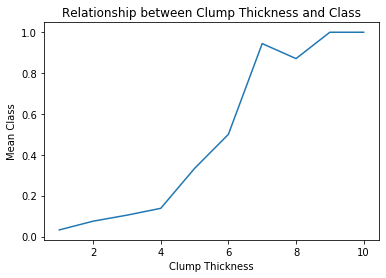

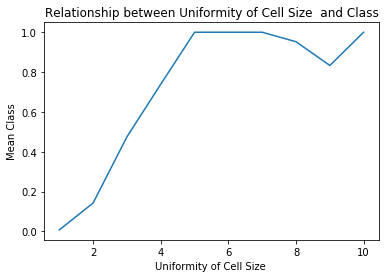

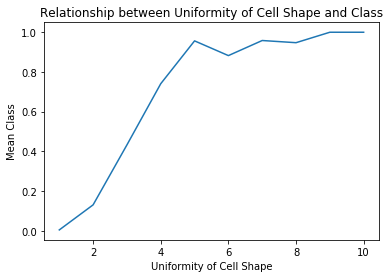

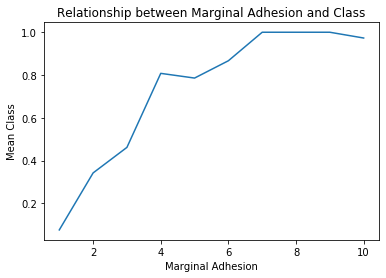

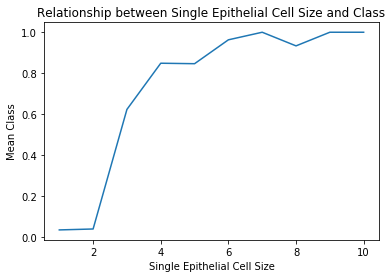

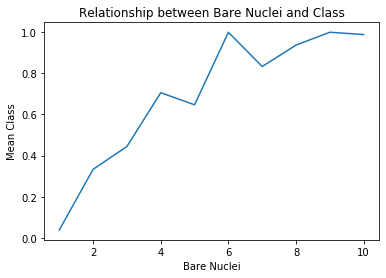

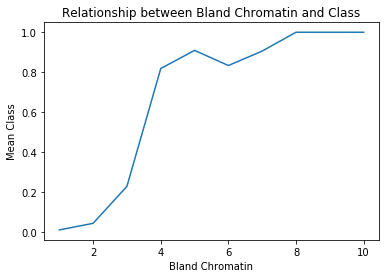

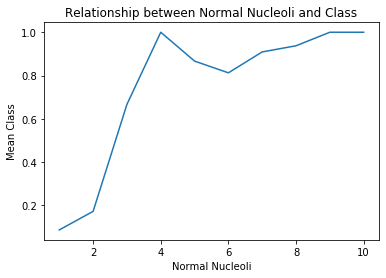

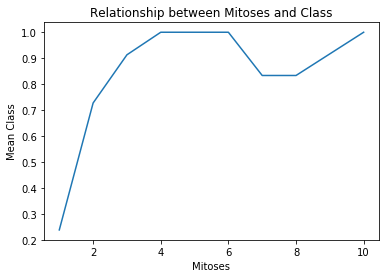

In [11]:
# let's explore the relationship of the categories with the target

for var in inputs.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['Class'].mean().plot()
    fig.set_title('Relationship between {} and Class'.format(var))
    fig.set_ylabel('Mean Class')
    plt.show()

You can see that the relationship between Class and indepentend variables goes up and down.


## Probability ratio encoding with pandas


### Advantages

- quick
- returns pandas dataframe

### Limitations of pandas:

- it does not preserve information from train data to propagate to test data

In [12]:
inputs.columns

Index(['Clump Thickness', 'Uniformity of Cell Size ',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

In [13]:
# let's calculate the probability of survived = 1 per category

prob_df = X_train.groupby(['Clump Thickness'])['Class'].mean()

# and capture it into a dataframe
prob_df = pd.DataFrame(prob_df)
prob_df

,Class
Clump Thickness,
1,0.032258
2,0.075000
3,0.104478
4,0.137931
5,0.333333
6,0.500000
7,0.944444
8,0.870968
9,1.000000


In [14]:
# and now the probability of survived = 0
#0 for benign, 1 for malignant
prob_df.rename(columns={"Class": "malignant"}, inplace=True)


In [15]:
prob_df.columns

Index(['malignant'], dtype='object')

In [16]:
prob_df['benign'] = 1 - prob_df.malignant

prob_df

,malignant,benign
Clump Thickness,,
1,0.032258,0.967742
2,0.075000,0.925000
3,0.104478,0.895522
4,0.137931,0.862069
5,0.333333,0.666667
6,0.500000,0.500000
7,0.944444,0.055556
8,0.870968,0.129032
9,1.000000,0.000000


In [17]:
prob_df['ratio'] = prob_df['malignant'] / prob_df['benign']

In [18]:
prob_df

,malignant,benign,ratio
Clump Thickness,,,
1,0.032258,0.967742,0.033333
2,0.075000,0.925000,0.081081
3,0.104478,0.895522,0.116667
4,0.137931,0.862069,0.160000
5,0.333333,0.666667,0.500000
6,0.500000,0.500000,1.000000
7,0.944444,0.055556,17.000000
8,0.870968,0.129032,6.750000
9,1.000000,0.000000,inf


In [19]:
# Solving division by zero. when a number is divided by zero, we make the result equal to 100

In [20]:
prob_df.ratio = np.where(prob_df.benign == 0, 100, prob_df['malignant'] / prob_df['benign'])

In [21]:
prob_df

,malignant,benign,ratio
Clump Thickness,,,
1,0.032258,0.967742,0.033333
2,0.075000,0.925000,0.081081
3,0.104478,0.895522,0.116667
4,0.137931,0.862069,0.160000
5,0.333333,0.666667,0.500000
6,0.500000,0.500000,1.000000
7,0.944444,0.055556,17.000000
8,0.870968,0.129032,6.750000
9,1.000000,0.000000,100.000000


In [22]:
# and now let's capture the ratio in a dictionary

ordered_labels = prob_df['ratio'].to_dict()

ordered_labels

{1: 0.03333333333333333,
 2: 0.08108108108108107,
 3: 0.11666666666666665,
 4: 0.16,
 5: 0.49999999999999994,
 6: 1.0,
 7: 16.999999999999993,
 8: 6.75,
 9: 100.0,
 10: 100.0}

In [23]:
# now, we replace the labels with the ratios

X_train['Clump Thickness'] = X_train['Clump Thickness'].map(ordered_labels)
X_test['Clump Thickness'] = X_test['Clump Thickness'].map(ordered_labels)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
X_train['Clump Thickness'].head(11)

109      6.750000
477      0.160000
205      6.750000
318      0.500000
190      6.750000
306      0.160000
406    100.000000
360      0.116667
366      0.033333
222      0.033333
494      0.081081
Name: Clump Thickness, dtype: float64

In [25]:
# let's calculate the probability of the carcer being 2 for benign = 1 per category
# we can turn the previous commands into 2 functions


def find_category_mappings(df, variable, target):

    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    
    tmp['non-target'] = 1 - tmp[target]
    
    tmp['ratio'] = tmp[target] / tmp['non-target']
    
    # when tmp['non-target'] == 0 the division is not defined, therfore I make the division = 100
    tmp.ratio = np.where(tmp['non-target'] == 0, 100, tmp[target] / tmp['non-target'])
    
    return tmp['ratio'].to_dict()


def integer_encode(train, test, variable, ordinal_mapping):

    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [26]:
# and now we run a loop over the remaining categorical variables

for variable in [ 'Clump Thickness', 'Uniformity of Cell Size ','Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin','Normal Nucleoli', 'Mitoses']:
    
    mappings = find_category_mappings(X_train, variable, 'Class')
    
    integer_encode(X_train, X_test, variable, mappings)

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
# let's see the result

X_train.head(10)

,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
109,1,6.750000,100.000000,2.857143,0.857143,5.500000,100.000000,0.295455,0.094891,0.312500
477,0,0.160000,0.007843,0.004149,0.081712,0.034483,0.040146,0.044643,0.094891,0.312500
205,1,6.750000,100.000000,18.000000,100.000000,5.600000,15.000000,9.600000,10.000000,0.312500
318,0,0.500000,0.166667,0.150000,0.520000,0.039370,0.040146,0.044643,0.208333,0.312500
190,0,6.750000,2.833333,2.857143,3.666667,5.600000,5.000000,9.600000,15.000000,2.666667
306,0,0.160000,2.833333,2.857143,4.200000,26.000000,1.833333,9.600000,2.000000,0.312500
406,1,100.000000,100.000000,100.000000,100.000000,100.000000,88.000000,100.000000,0.208333,0.312500
360,0,0.116667,0.007843,0.150000,0.081712,0.039370,0.040146,0.044643,0.094891,0.312500
366,0,0.033333,0.007843,0.004149,0.081712,0.039370,0.040146,0.009804,0.094891,0.312500
222,0,0.033333,0.007843,0.004149,0.081712,0.034483,0.040146,0.295455,0.094891,0.312500


In [28]:
X_train.columns

Index(['Class', 'Clump Thickness', 'Uniformity of Cell Size ',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'],
      dtype='object')

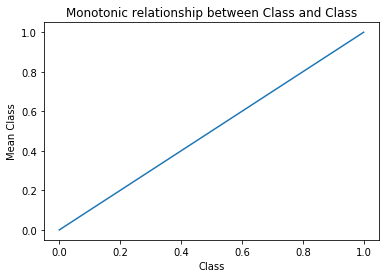

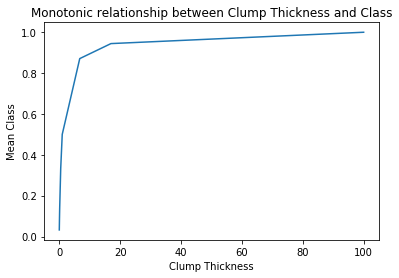

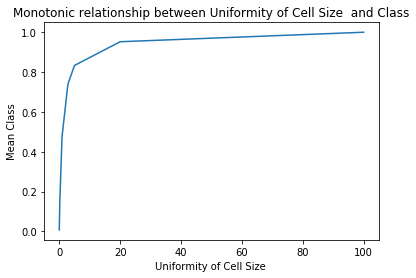

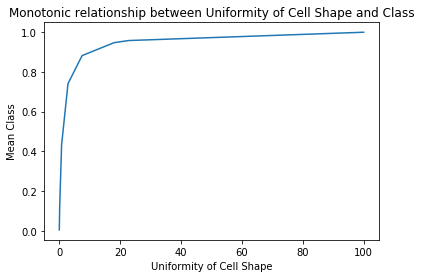

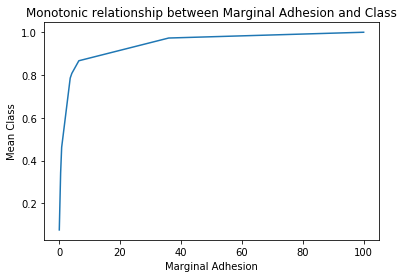

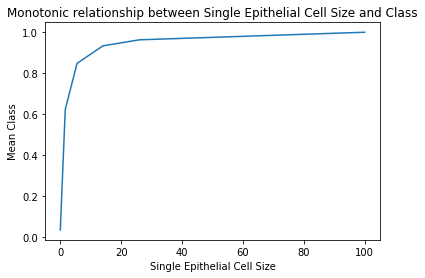

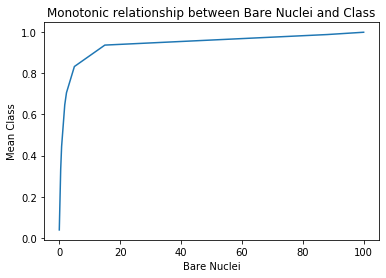

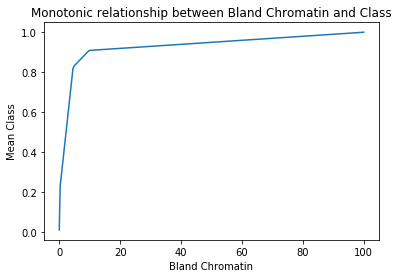

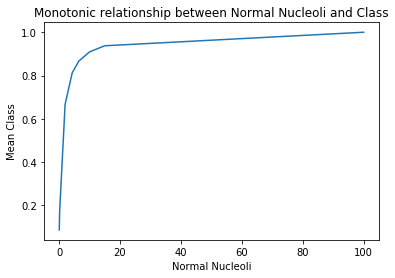

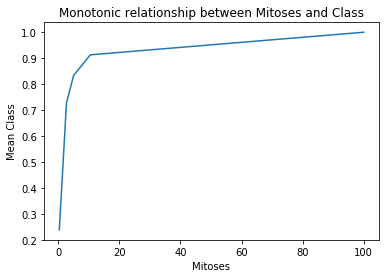

In [29]:
# let's inspect the newly created monotonic relationship
# between the categorical variables and the target

for var in X_train.columns:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['Class'].mean().plot()
    fig.set_title('Monotonic relationship between {} and Class'.format(var))
    fig.set_ylabel('Mean Class')
    plt.show()

Note the monotonic relationships between the mean target and the categories.

### Note

Replacing categorical labels with this code and method will generate missing values for categories present in the test set that were not seen in the training set. Therefore it is extremely important to handle rare labels before-hand. I will explain how to do this, in a later notebook.

**In addition, it will create NA or Inf if the probability of target = 0 is zero, as the division by zero is not defined.**